**Question 1: What is the difference between K-Means and Hierarchical Clustering?Provide a use case for each.**
   - K-Means
      - partion based clustering algorithm
      - Number of cluster (k) must be define in advance
      - use centroids for clusters
      - produces flat and non-overlapping clusters
      - Faster and scalable for large datasets
      - Sensitive to outliers and initial centroid selection
   - Hierarchical Clustering
      - tree based clustring algorithm
      - number of cluster is not required initially
      - users distance and linkage methods to merge cluster
      - produces a hierarchy of nested cluster
      - computationally expensive suitable for small datasets
      - less sensitive; depends on linkage method
      - can handle complex cluster shapes
      - dendrogram provides visual representation
   - uses case of K-Means
      - customer segment in e-commerce
      - used when dataset is large and number of clusters is known
      - helps in targeted marketing and recommendation system
  - uses case of Hierarchical Clustring
    - Gene expression analysis in bioinformatics
    - used when number of clusters is unknown
    - useful for understanding relationships between data points


**Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.**
  - the silhouette score is a metric used to evaluate the quality of clustering in unsupervised machine learning . it measures how well each data point fits within its assigned cluster compared to ohter cluster
  

**Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?**
   - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised, density-based clustering algorithm that groups data points based on how densely they are packed. Unlike K-Means, it can find clusters of arbitrary shape and can identify noise/outliers.
   - Epsilon (ε)
     - define the radius of the neighborhood around a data point
     - control how close points must be to be considerd neighbors
     - too small ε means many points is labeled as noise
     - to large ε means distance cluster may merge into one
     - proper ε hepls identifiy meaningul cluster boundaries
   - minimum points
      - minimum number of points requied within ε-neighborhood to form a dense region.
      - low minpoints means sensitive to noise  may form small clusters
      - high minpoints means only very dense cluster are formed, more points may be become noise
   - distance metric
      - measures distance between points(e.g., Euclidean, Manhattan)
   - Types of Points in DBSCAN
       - core point : Has at least MinPts within ε-neighborhood
       - Border Point : Lies within ε of a core point but has fewer than MinPts neighbors
       - Noise Point (Outlier) : Not reachable from any core point
   - How Parameters Influence the Clustering Process
      - ε and MinPts together determine cluster density
      - They control cluster size, shape, and noise detection
      - Proper tuning helps DBSCAN handle irregular shapes and outliers effectively

**Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?**
   - Feature scaling is a critical preprocessing step in clustering, especially for distance-based algorithms such as K-Means and DBSCAN. These algorithms rely heavily on distance calculations to group data points, and unscaled data can lead to misleading or incorrect clustering results.
   - Effect on Distance-Based Algorithms
      - K-Means uses Euclidean distance to assign points to clusters.
      - DBSCAN groups points based on distance (ε-neighborhood).
      - If features are on different scales, larger-range features dominate the distance.
      - Example:Income (₹10,000-₹1,00,000) will overpower Age (18-60).
   - Impact on K-Means
      - Unscaled data leads to incorrect centroids
      - Clusters become biased toward high-magnitude features
      - Results in poor and misleading clusters
   - Impact on DBSCAN
     - ε (epsilon) becomes meaningless without scaling
     - Points may appear far apart even when they are similar
     - Causes:Too many noise points, or One large incorrect cluster

   - Improves Fair Feature Contribution
     - Scaling ensures all features contribute equally
     - Prevents dominance of any single feature
   - Common Scaling Techniques
      - StandardScaler (mean = 0, std = 1) > most common
      - MinMaxScaler (range 0-1)

**Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?**
   - Elbow Method : The Elbow Method identifies the optimal number of clusters by finding the point where increasing K no longer significantly reduces clustering error.
   - How It Helps Determine the Optimal Number of Clusters
      - Increasing K always reduces WCSS, but only up to a point
      - fter the elbow point, adding more clusters gives diminishing return
      - the elbow represents the best balance between: Low clustring error , model simplicity

In [3]:
'''Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering,
and visualize the results with cluster centers.'''

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [40]:
x, y = make_blobs(n_samples=300, centers=4, random_state =1)

In [41]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=1)

In [42]:
centers = kmeans.cluster_centers_

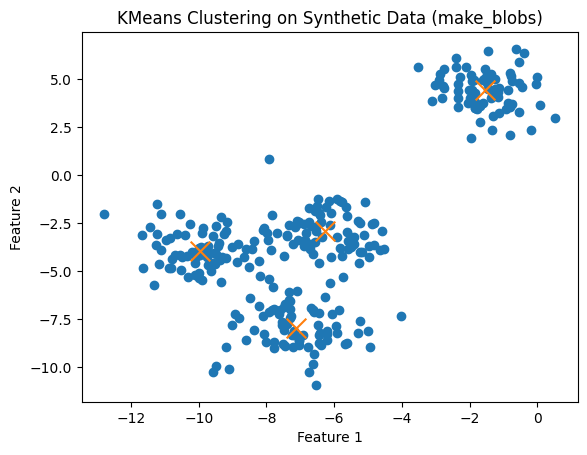

In [43]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200)
plt.title("KMeans Clustering on Synthetic Data (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [9]:
'''Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).'''

import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [14]:
# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

In [16]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [11]:
#  Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN(eps=1.5)

In [13]:
# Get cluster labels
labels = dbscan.labels_

In [15]:
# Count number of clusters (excluding noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", num_clusters)

Number of clusters found (excluding noise): 0


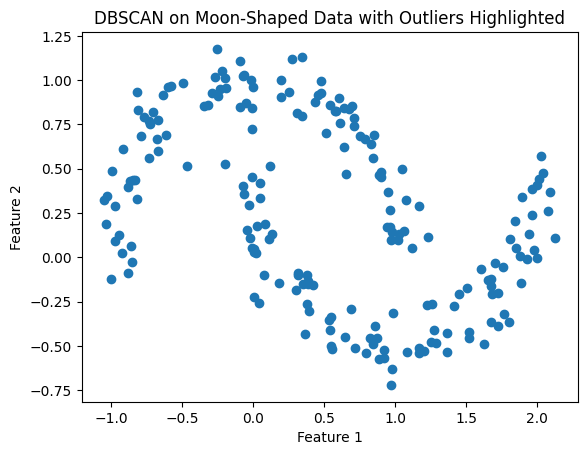

In [39]:
'''Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot'''

# Question 8: DBSCAN on moon-shaped data and highlight outliers

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=1)

#  Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (noise points)
outliers = labels == -1

# Plot clusters and outliers
plt.figure()
plt.scatter(X[~outliers, 0], X[~outliers, 1])
plt.scatter(X[outliers, 0], X[outliers, 1], marker='x', s=100)
plt.title("DBSCAN on Moon-Shaped Data with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [20]:
'''Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot'''

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [21]:
wine = load_wine()
X = wine.data

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [24]:
agglo = AgglomerativeClustering(n_clusters=3)
clusters = agglo.fit_predict(X_pca)

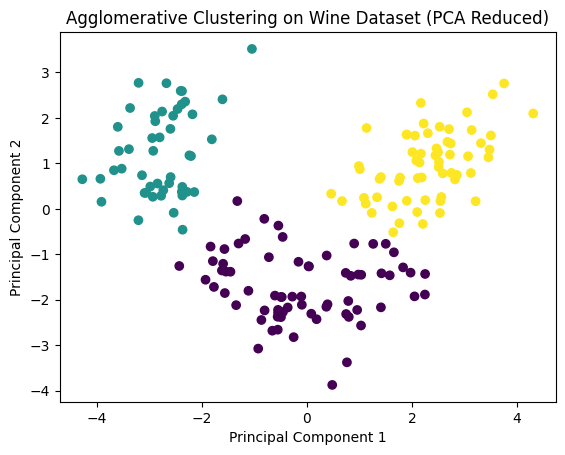

In [25]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.show()


In [26]:
'''Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?'''


# Customer Segmentation Using K-Means Clustering (E-commerce)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
# Create a sample dataset
data = {
    'Age': [25, 34, 22, 45, 36, 52, 23, 40],
    'Annual_Income': [30000, 60000, 25000, 80000, 65000, 90000, 28000, 70000],
    'Total_Spend': [5000, 15000, 4000, 20000, 16000, 25000, 4500, 18000],
    'Purchase_Frequency': [10, 25, 8, 30, 28, 35, 9, 27]
}

df = pd.DataFrame(data)
print(df)


   Age  Annual_Income  Total_Spend  Purchase_Frequency
0   25          30000         5000                  10
1   34          60000        15000                  25
2   22          25000         4000                   8
3   45          80000        20000                  30
4   36          65000        16000                  28
5   52          90000        25000                  35
6   23          28000         4500                   9
7   40          70000        18000                  27


In [28]:
# Fill missing values (if any)
df.fillna(df.mean(), inplace=True)


In [32]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


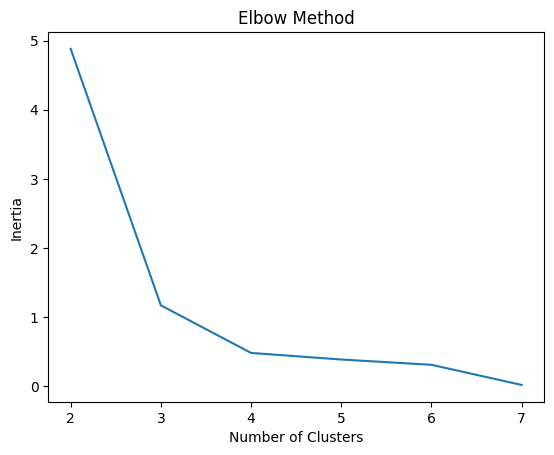

In [33]:
# Elbow Method
inertia = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [44]:
# Silhouette Score
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.7434719793988656
Silhouette Score for k=3: 0.6459363626007595
Silhouette Score for k=4: 0.5123708346419948
Silhouette Score for k=5: 0.420657427745716


In [35]:
# Apply K-Means Clustering
# Train final model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print(df)


   Age  Annual_Income  Total_Spend  Purchase_Frequency  Cluster
0   25          30000         5000                  10        0
1   34          60000        15000                  25        2
2   22          25000         4000                   8        0
3   45          80000        20000                  30        1
4   36          65000        16000                  28        2
5   52          90000        25000                  35        1
6   23          28000         4500                   9        0
7   40          70000        18000                  27        2


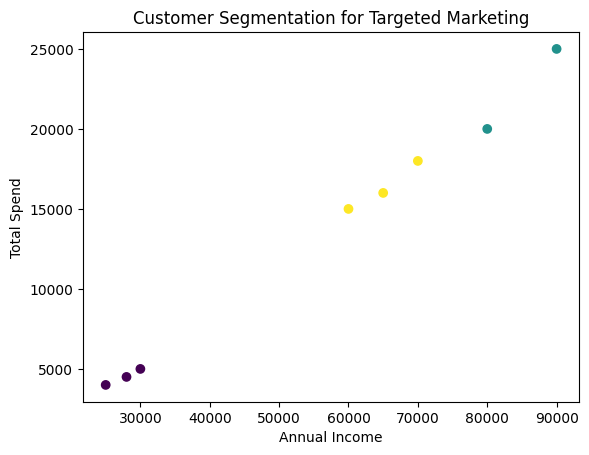

In [36]:
# Visualize Customer Segments
plt.scatter(df['Annual_Income'], df['Total_Spend'], c=df['Cluster'])
plt.xlabel("Annual Income")
plt.ylabel("Total Spend")
plt.title("Customer Segmentation for Targeted Marketing")
plt.show()
